# Orizon: Frequência de Exames Adicionais

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

Lendo os dados para a dataframe:

In [2]:
df = pd.read_csv("../orizon/full_extracts/data_30726034.csv", encoding = "ISO-8859-1")

Selecionando apenas os campos relevantes para esta análise:

In [3]:
selected_df = pd.concat([df["'id_conta'"], df["'servico'"], df["'descricao_despesa'"], df["'tipo_item'"]], axis=1)

Removendo as aspas das labels para facilitar o trabalho:

In [4]:
selected_df.columns = ["id_conta", "servico", "descricao", "tipo_item"]

Vamos trabalhar apenas com os id_conta atrelados à mais de um serviço:

In [5]:
count_df = selected_df.groupby("id_conta").count()

In [6]:
def get_count(acc_id):
    return count_df.lookup([acc_id], ["servico"])[0]

In [7]:
selected_df["count"] = selected_df["id_conta"].map(get_count)

In [8]:
selected_df = selected_df[selected_df["count"] > 1].drop("count", axis=1)

Algumas observações possuem apenas " no campo serviço, vamos filtra-las também:

In [9]:
selected_df = selected_df[selected_df["servico"] != '"']
selected_df = selected_df[selected_df["servico"] != "''"]

Montaremos agora nossa tabela principal: ela terá uma coluna para cada serviço disponível no dataset, uma coluna para a porcentagem de id_conta's em que aquele serviço aparece, outra coluna para o tipo de item daquele serviço e outra para sua descrição.

Primeiro, vamos definir uma função para computar a porcentagem dos id_conta em que cada serviço aparece:

In [10]:
unique_acc_ids = len(selected_df["id_conta"].unique())
def get_percentage(service):
    count_num = len(selected_df[selected_df["servico"] == service]["id_conta"].unique())
    return (float(count_num) / unique_acc_ids) * 100.0

Agora, uma função para pegar uma descrição qualquer para cada serviço:

In [11]:
def get_description(service):
    return selected_df[selected_df["servico"] == service]["descricao"].iloc[0]

E uma função para pegar o tipo de item para cada serviço:

In [12]:
def get_item_type(service):
    return selected_df[selected_df["servico"] == service]["tipo_item"].iloc[0]

Agora que todas as funções estão prontas, podemos montar a dataframe:

In [13]:
all_services = selected_df["servico"].unique()
percentages = [get_percentage(service) for service in all_services]
descriptions = [get_description(service) for service in all_services]
item_types = [get_item_type(service) for service in all_services]
df_dict = {'servico': all_services, '%': percentages, "descricao": descriptions, "tipo de item": item_types}
final_df = pd.DataFrame(df_dict)

E selecionamos os serviços em que aparecem em mais de 20% dos id_conta para exibição:

In [14]:
final_df[final_df["%"] > 20].sort_values("%", axis=0, ascending=False)

,%,descricao,servico,tipo de item
11,60.0,'40302423','Alta Melhorado',odonto e demais Ã¡reas de saÃºde)'
19,44.0,'DIPIRONA 1G AMPOLA 2ML','90196031','MEDICAMENTOS'
44,38.0,'CEFAZOLINA 1G FRASCO','90008332','MEDICAMENTOS'
126,30.0,'SERINGA SEM AG.05ML LUER-LOK 990175','70705313','MATERIAIS'
434,30.0,'SERINGA SEM AG.10ML LUER-LOK PLASTIPAK 990172','70705330','MATERIAIS'
162,30.0,'SORO RINGER LACTATO - 500ML','90019717','MEDICAMENTOS'
49,30.0,'SORO FISIOLOGICO 0,'90019822','MEDICAMENTOS'
153,30.0,'AGULHA DESC. 40 X 12 (BD)','70014370','MATERIAIS'
9,30.0,'DEXAMETASONA 4MG/ML FRASCO 2,'90003551','MEDICAMENTOS'
107,28.0,'CATETER NASAL OXIGENIO TP.OCULOS 140CM 2807P','0002340147','MATERIAIS'


Vamos agora fazer uma analise também dos tipos de item, vendo qual a porcentagem dos id_conta em que cada um deles aparece: 

In [15]:
item_type_dict = {}
for tipo in selected_df["tipo_item"].unique():
    item_type_dict[tipo] = len(selected_df[selected_df["tipo_item"] == tipo]["id_conta"].unique()) * 100 / 50.0

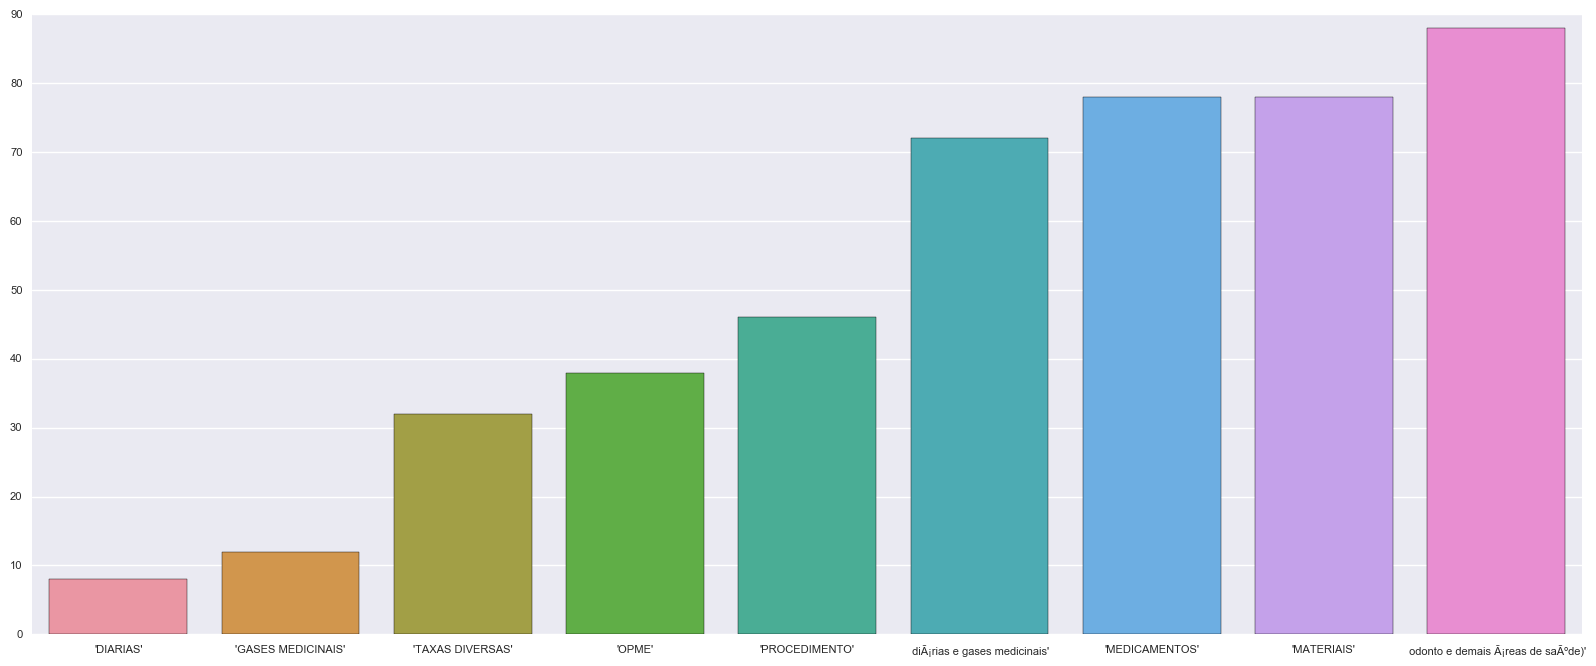

In [16]:
%matplotlib inline 
tup_list = [(key, item_type_dict[key]) for key in item_type_dict.keys()]
sorted_list = sorted(tup_list, key=lambda tup: tup[1])
sb.set(font_scale=0.8)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 8)
sb.barplot(x=[tup[0] for tup in sorted_list], y=[tup[1] for tup in sorted_list],ax=ax)

Gerando uma tabela para cada tipo de item:

In [17]:
for item in final_df["tipo de item"].unique():
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("-------------" + item + "-------------")
        display(final_df[final_df["tipo de item"] == item].drop("tipo de item", axis=1).sort_values("%", axis=0, ascending=False))


-------------'PROCEDIMENTO'-------------


,%,descricao,servico
122,20.0,'2TOTAL MATERIAIS','61430056'
145,20.0,'1TOTAL MEDICAMENTOS','61430013'
999,16.0,'PC. ARTROPLASTIA JOELHO C/IMPLANTE - APTO','65410254'
2,12.0,'Artroplastia total de joelho com implantes - ...,'30726034'
306,6.0,'RX JOELHO','40804054'
0,4.0,'Artrotomia - tratamento cirÃºrgico','30726042'
293,4.0,'GASOMETRIA (PH,'40302016'
1606,4.0,'ASSISTENCIA FISIATRICA RESPIRATORIA EM DOENTE...,'20203047'
1392,4.0,'Visita Hospitalar (Paciente Internado) - Acom...,'10102019'
1363,4.0,'Recuperacao Funcional Pos-Operatoria Ou Pos-I...,'20103670'


-------------'MATERIAIS'-------------


,%,descricao,servico
434,30.0,'SERINGA SEM AG.10ML LUER-LOK PLASTIPAK 990172','70705330'
126,30.0,'SERINGA SEM AG.05ML LUER-LOK 990175','70705313'
153,30.0,'AGULHA DESC. 40 X 12 (BD)','70014370'
107,28.0,'CATETER NASAL OXIGENIO TP.OCULOS 140CM 2807P','0002340147'
143,28.0,'SERINGA SEM AG.20ML LUER SLIP PLASTIPAK 990173','70705348'
3,24.0,'FIO CIRURGICO MONONYLON 3.0 1171T','70259496'
108,20.0,'ELETRODO PARA MONITORIZACAO MICROPORE 2239 50...,'70204241'
536,20.0,'LAMINA BISTURI NR 11','70360758'
43,18.0,'LAMINA BISTURI N.15','70360812'
559,16.0,'AGULHA HIPODERMICA 25X7 PRECISIONGLIDE 300327...,'70014280'


-------------'MEDICAMENTOS'-------------


,%,descricao,servico
19,44.0,'DIPIRONA 1G AMPOLA 2ML','90196031'
44,38.0,'CEFAZOLINA 1G FRASCO','90008332'
162,30.0,'SORO RINGER LACTATO - 500ML','90019717'
9,30.0,'DEXAMETASONA 4MG/ML FRASCO 2,'90003551'
49,30.0,'SORO FISIOLOGICO 0,'90019822'
67,28.0,'SULFATO DE EFEDRINA 50MG AMP','90045980'
478,26.0,'CLEXANE 40MG/0,'90194500'
113,26.0,'NEOCAINA ISOBARICA','90047249'
20,26.0,'MIDAZOLAM 5MG AMP. 5ML','90184378'
27,26.0,'MORFINA 0,'90045769'


------------- odonto e demais Ã¡reas de saÃºde)'-------------


,%,descricao,servico
11,60.0,'40302423','Alta Melhorado'
635,6.0,'40302547','Permanencia por outros motivos'
1124,4.0,'40304590','ENCERRAMENTO ADMINISTRATIVO'
947,2.0,'10104020','Permanencia por IntercorrÃªncia'


-------------'OPME'-------------


,%,descricao,servico
802,6.0,'DRENO DE SUCCAO CONTINUA','70199507'
435,4.0,'PONTA ASPIRACAO ASPLASS-80201','99999999'
682,4.0,'DRENO PARA SUCCAO CONVENCIONAL ZAMMIVAC 32','5514074'
1287,4.0,'DRENO SUCCAO RES.400ML 6.4 BIO DREN','0000072449'
1376,2.0,'Cimento Osseo Osteobond 40g - Zimmer','00067155'
1422,2.0,'BASE TIBIAL MODULAR III MEDIA REVISAO','09047546'
1414,2.0,'CAMPO CIRURGICO EST.STERI DRAPE 91X83CM AD.59...,'70856591'
1413,2.0,'ASPIRADOR CIRURGICO DESCARTAVEL','70033862'
1405,2.0,'CIMENTO ORTOPEDICO VISCOSIDADE NORMAL','70151873'
1394,2.0,'Componente Base Tibial Metalica Precoat Tam. ...,'00067937'


-------------'TAXAS DIVERSAS'-------------


,%,descricao,servico
943,8.0,'TAXA DE COMERCIALIZACAO PARA PAGAMENTO DIRETO...,'81071183'
1332,4.0,'Aluguel/Taxa De Bisturi Bipolar,'60025492'
860,4.0,'TX INTENS.IMAGEM BLOCO CIR.','60029072'
1331,4.0,'Aluguel / Taxa De Garrote PneumÃ¡tico,'60026987'
1295,4.0,'TAXA SALA C.C./C.O. ATE 2HS. EQUIP','81013434'
1288,4.0,'TAXA MONITOR SALA DE RECUP.','81038810'
556,4.0,'TX COMERCIALIZACAO MAT ESPECIAL','61210579'
1345,2.0,'Taxa De RefeiÃ§Ã£o De Acompanhante (AlmoÃ§o O...,'60033533'
1346,2.0,'Taxa De Registro De InternaÃ§Ã£o','60033568'
1348,2.0,'Taxa de sala porte 06','62050074'


-------------'GASES MEDICINAIS'-------------


,%,descricao,servico
244,2.0,'OXIGENIO NO RESPIRADOR NO CENTRO CIRURGICO 3L...,'90100019'
552,2.0,'OXIGENIO','72001003'
632,2.0,'OXIGENIO 03 L MIN HORA','61321206'
880,2.0,'OXIGENIO EM CATETER POR HORA','60034335'
1289,2.0,'OXIGENIO','86011472'
1319,2.0,'OxigÃªnio atÃ© 3 L/min - Por hora','62140019'


-------------'DIARIAS'-------------


,%,descricao,servico
249,2.0,'APARTAMENTO - UN','90010035'
250,2.0,'UTI ADULTO - UN','90010086'
1338,2.0,'DiÃ¡ria De Apartamento Simples','60000554'
1377,2.0,'DiÃ¡ria De Acompanhante Somente Com CafÃ© Da ...,'60000473'
1378,2.0,'DiÃ¡ria De Uti Adulto Geral','60001038'
1604,2.0,'DIARIA DE ACOMPANHANTE COM REFEICAO COMPLETA','60000384'
1610,2.0,'DIARIA DE ENFERMARIA','60000635'
1697,2.0,'TAXA DE REFEICOES PARA ACOMPANHANTE POR DIA','00001108'


------------- diÃ¡rias e gases medicinais'-------------


,%,descricao,servico
558,14.0,'60034122','Alta Curado'
1545,2.0,'60033568','Alta por Outros motivos'
